In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import time
import sys

from ML_matcher_helpers import *

# MLPRegressor $ \rightarrow $ solver = adam
Multi-layer Perceptron regressor
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [2]:
# Load trainning data
NPions = "10"
trainning_data, trainning_data_MatchTruth, trainning_data_NPairsMCHTracks = load_data(NPions, nMCHTracks="50000")

# Scale trainning data
scaler = StandardScaler()
scaler.fit(trainning_data)
trainning_data = scaler.transform(trainning_data)

Data not loaded! Continuing...
Loading data_50000MCHTraks_20Mu_10PiPerEvent
Loaded data in  0.10959161968348781  minutes ( 6.575497181009268  seconds)
N MCH Tracks = 50000
N pairs = 1368617


In [3]:
# MLPRegressor trainning
hiddenLayersConfig=(35,30,25,20,15,10,5)
mlpr = MLPRegressor_initAndTrain(hiddenLayersConfig,
                                solver = 'adam',
                                max_iter = 25000,
                                activation = 'relu',
                                trainning_data = trainning_data,
                                trainning_data_MatchTruth = trainning_data_MatchTruth)

mlpr trainning time =  1.9357237179331908  minutes
Trainning Accuracy:  0.9628300147536509


In [4]:
# Load test data
NPions = "10"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_10PiPerEvent
Loaded data in  0.0013175783669187998  minutes ( 0.07905470201512799  seconds)
N MCH Tracks = 1000
N pairs = 27873


In [5]:
# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

Prediction accuracy:
 0.9667575690130694


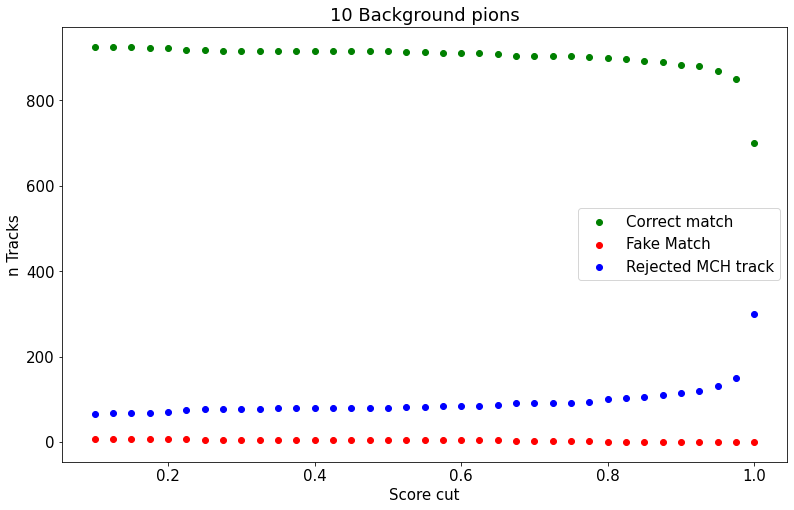

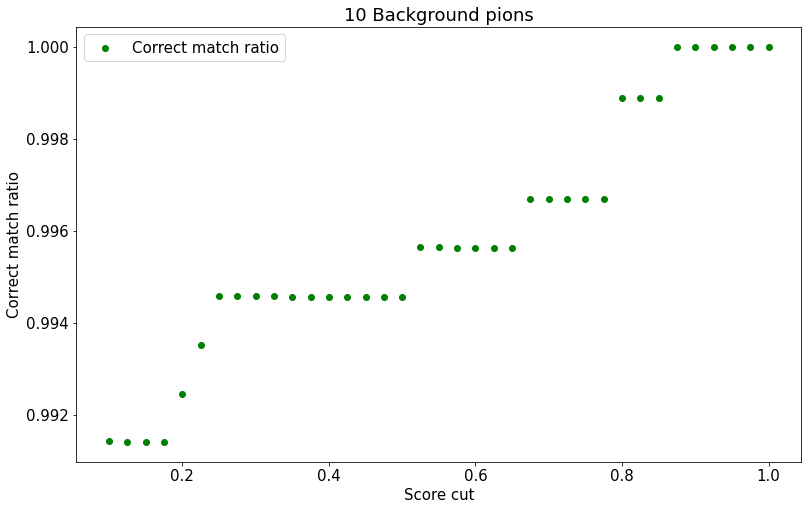

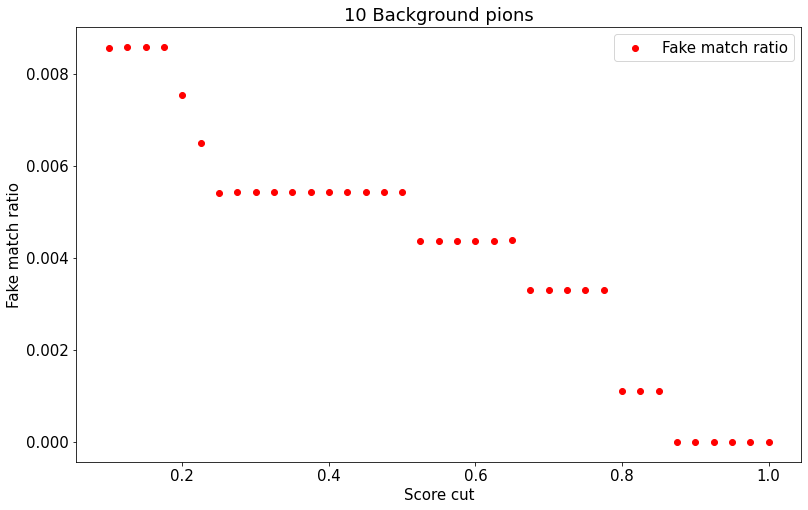

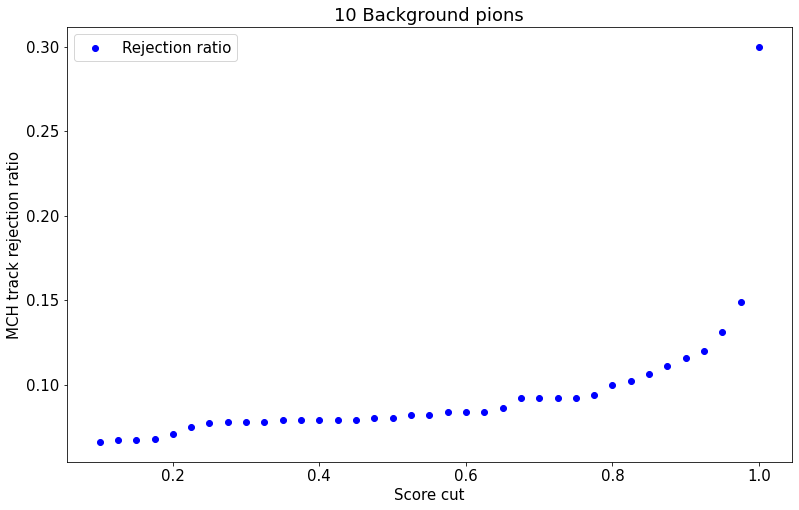

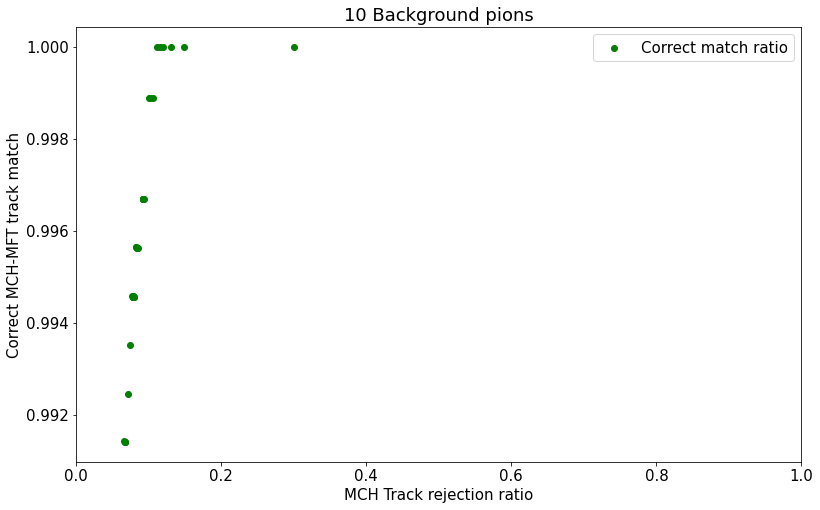

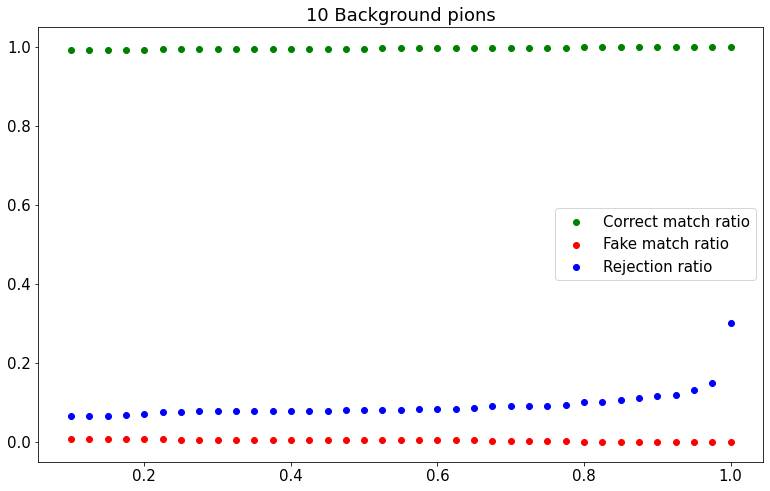

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [926. 925. 925. 924. 922. 919. 918. 917. 917. 917. 916. 916. 916. 916.
 916. 915. 915. 914. 914. 912. 912. 912. 910. 905. 905. 905. 905. 903.
 899. 897. 893. 889. 884. 880. 869. 851. 700.]
fake matches:  [8. 8. 8. 8. 7. 6. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 4. 4. 4. 4. 4. 3.
 3. 3. 3. 3. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
no matches:  [ 66.  67.  67.  68.  71.  75.  77.  78.  78.  78.  79.  79.  79.  79.
  79.  80.  80.  82.  82.  84.  84.  84.  86.  92.  92.  92.  92.  94.
 100. 102. 106. 111. 116. 120. 131. 149. 300.]


In [6]:
# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")

In [7]:
test_data_matches = np.where(test_data_MatchTruth == 1)
first_test_data_match=test_data_matches[0][0]
print("Index of first_test_data_match: ",first_test_data_match)
Match_pred_single = mlpr.predict(test_data[first_test_data_match].reshape(1, -1))
print("Score:",Match_pred_single)

Index of first_test_data_match:  10
Score: [1.00674514]


In [8]:
print("Indexes of correct matches (input MC):")
print(test_data_matches)

Indexes of correct matches (input MC):
(array([   10,    33,    63,    88,   118,   189,   204,   244,   252,
         291,   319,   355,   378,   390,   418,   433,   460,   492,
         511,   551,   598,   624,   642,   683,   688,   717,   774,
         809,   827,   871,   876,   945,   960,   991,  1019,  1062,
        1081,  1108,  1140,  1172,  1212,  1237,  1271,  1292,  1307,
        1335,  1364,  1396,  1421,  1448,  1453,  1489,  1500,  1523,
        1546,  1578,  1591,  1636,  1661,  1671,  1703,  1733,  1748,
        1784,  1804,  1857,  1876,  1903,  1944,  1965,  1974,  2001,
        2037,  2061,  2084,  2121,  2164,  2181,  2208,  2261,  2314,
        2345,  2361,  2402,  2422,  2476,  2491,  2520,  2576,  2583,
        2620,  2685,  2692,  2747,  2777,  2803,  2824,  2850,  2889,
        2918,  2933,  2962,  2991,  3029,  3049,  3076,  3117,  3179,
        3194,  3218,  3247,  3277,  3294,  3325,  3364,  3393,  3423,
        3448,  3465,  3530,  3544,  3563,  3586,  

In [9]:
print("Indexes of predicted matches for test data (score > 0.5):")
print(np.where(Match_pred > 0.5))

Indexes of predicted matches for test data (score > 0.5):
(array([   10,    33,    63,    88,   118,   189,   204,   244,   252,
         291,   319,   355,   378,   390,   418,   433,   460,   492,
         511,   551,   598,   624,   642,   683,   688,   717,   774,
         809,   827,   871,   876,   960,   991,  1019,  1062,  1081,
        1108,  1140,  1172,  1212,  1237,  1271,  1292,  1307,  1335,
        1364,  1396,  1421,  1448,  1453,  1489,  1500,  1523,  1546,
        1578,  1591,  1661,  1671,  1703,  1733,  1748,  1784,  1804,
        1857,  1876,  1903,  1944,  1965,  1974,  2001,  2037,  2061,
        2084,  2121,  2164,  2181,  2208,  2261,  2314,  2361,  2402,
        2422,  2476,  2491,  2520,  2576,  2583,  2620,  2685,  2692,
        2747,  2777,  2803,  2824,  2850,  2889,  2918,  2933,  2962,
        2991,  3029,  3049,  3076,  3117,  3179,  3194,  3218,  3219,
        3247,  3274,  3275,  3277,  3294,  3364,  3393,  3423,  3448,
        3465,  3530,  3544,  35

# Evaluate MLP Regressor prediction at higher multiplicities

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_400PiPerEvent
Loaded data in  0.025878405433225758  minutes ( 1.5527043259935454  seconds)
N MCH Tracks = 1000
N pairs = 382091
Prediction accuracy:
 0.8167542098255584


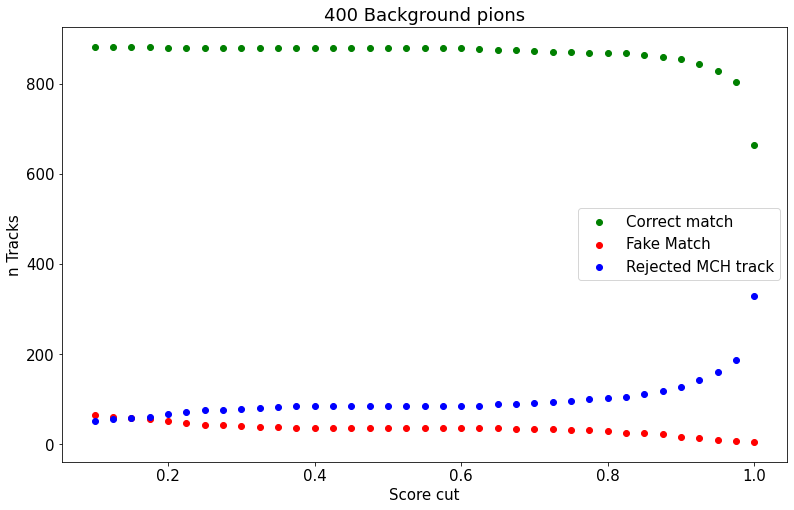

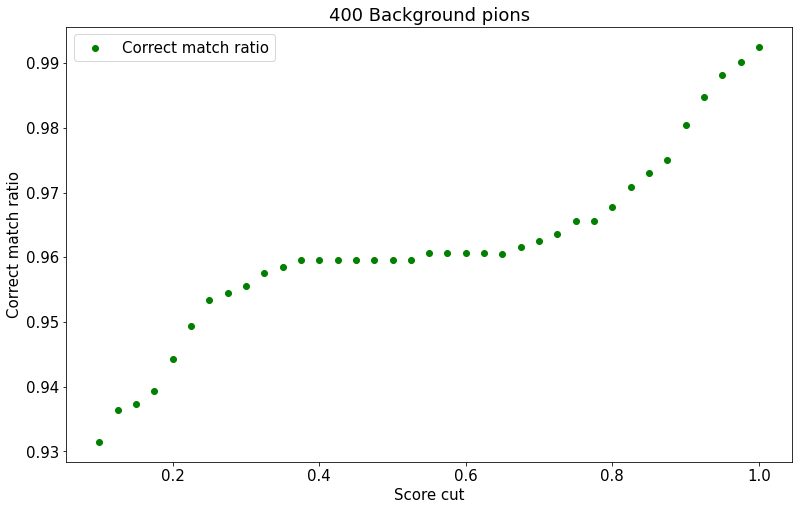

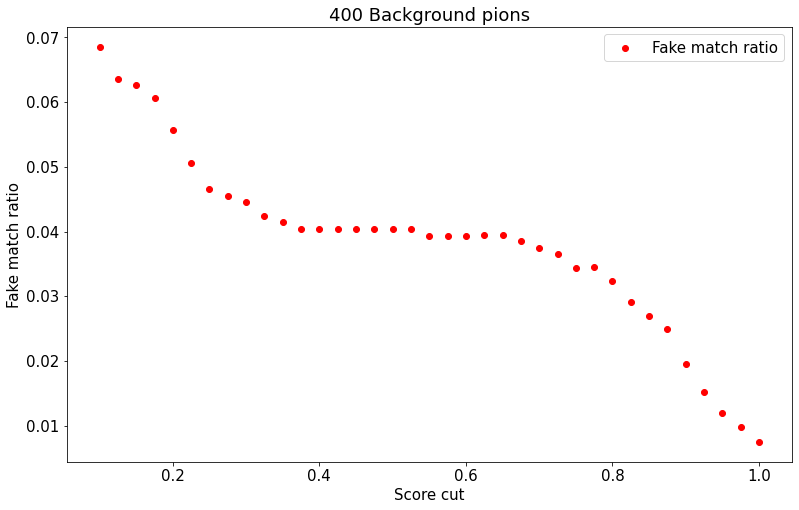

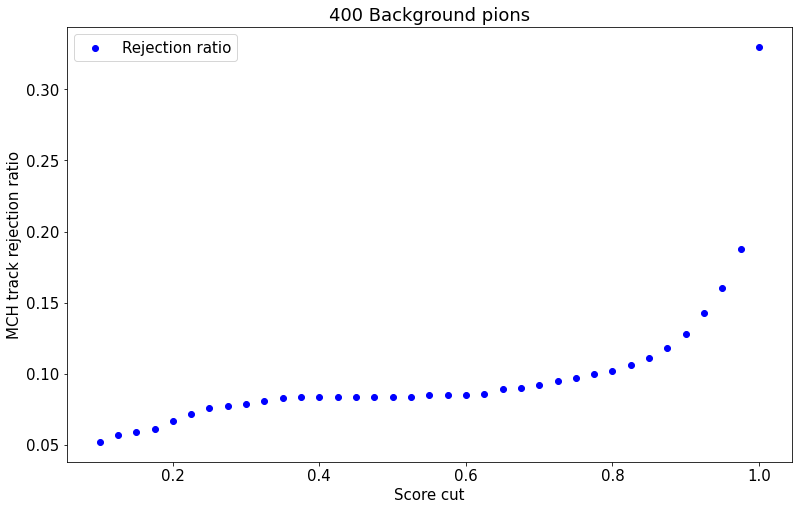

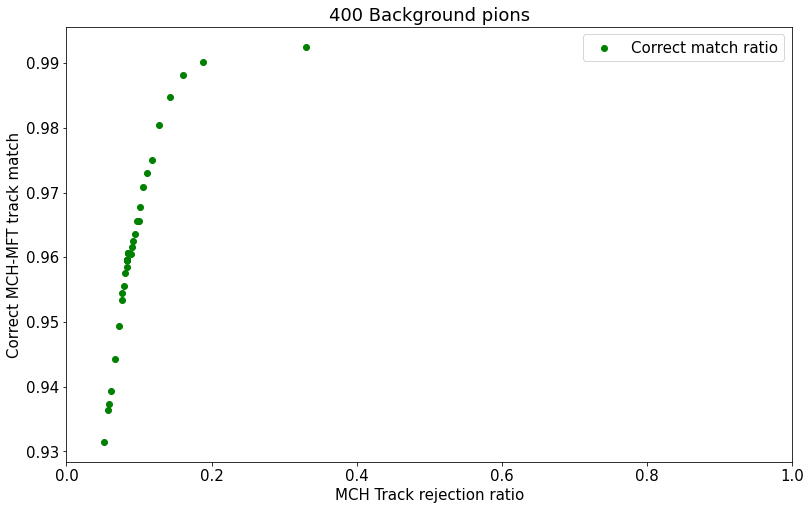

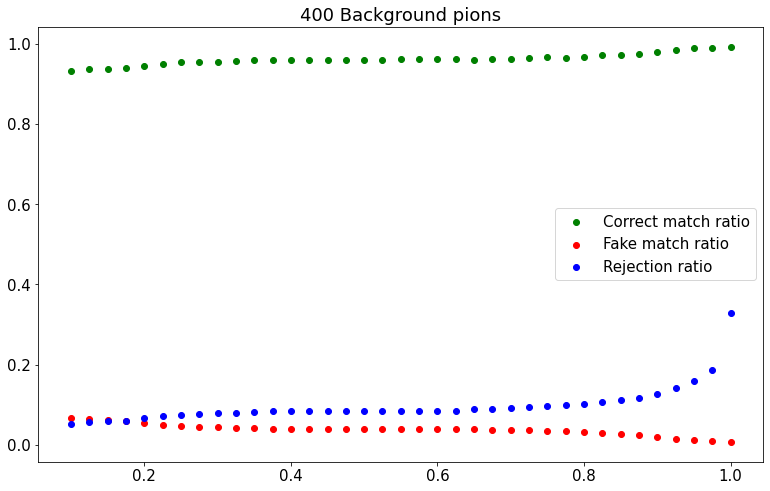

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [883. 883. 882. 882. 881. 881. 881. 881. 880. 880. 879. 879. 879. 879.
 879. 879. 879. 879. 879. 879. 879. 878. 875. 875. 874. 872. 872. 869.
 869. 868. 865. 860. 855. 844. 830. 804. 665.]
fake matches:  [65. 60. 59. 57. 52. 47. 43. 42. 41. 39. 38. 37. 37. 37. 37. 37. 37. 37.
 36. 36. 36. 36. 36. 35. 34. 33. 31. 31. 29. 26. 24. 22. 17. 13. 10.  8.
  5.]
no matches:  [ 52.  57.  59.  61.  67.  72.  76.  77.  79.  81.  83.  84.  84.  84.
  84.  84.  84.  84.  85.  85.  85.  86.  89.  90.  92.  95.  97. 100.
 102. 106. 111. 118. 128. 143. 160. 188. 330.]


In [10]:
# Load test data
NPions = "400"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_800PiPerEvent
Loaded data in  0.06294400556701779  minutes ( 3.7766403340210672  seconds)
N MCH Tracks = 1000
N pairs = 757144
Prediction accuracy:
 0.6640872790586292


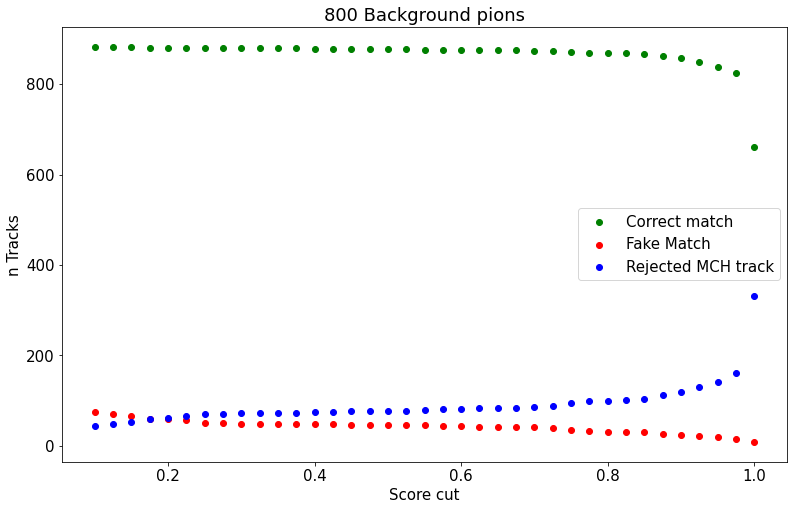

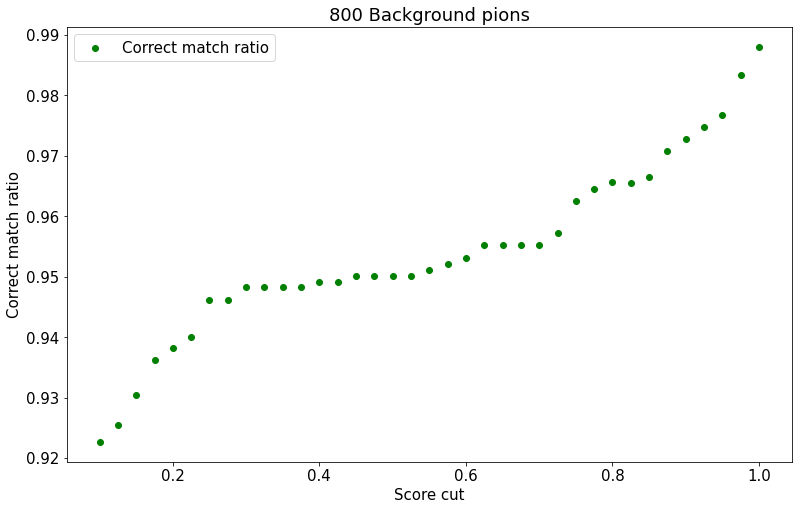

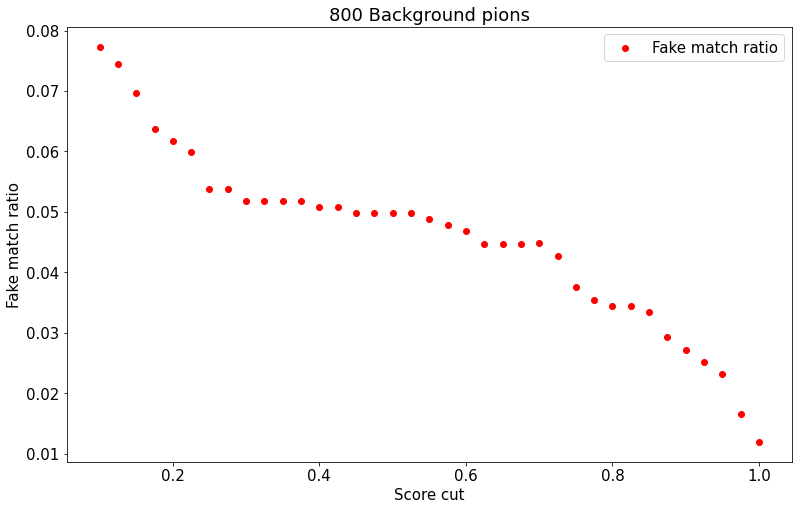

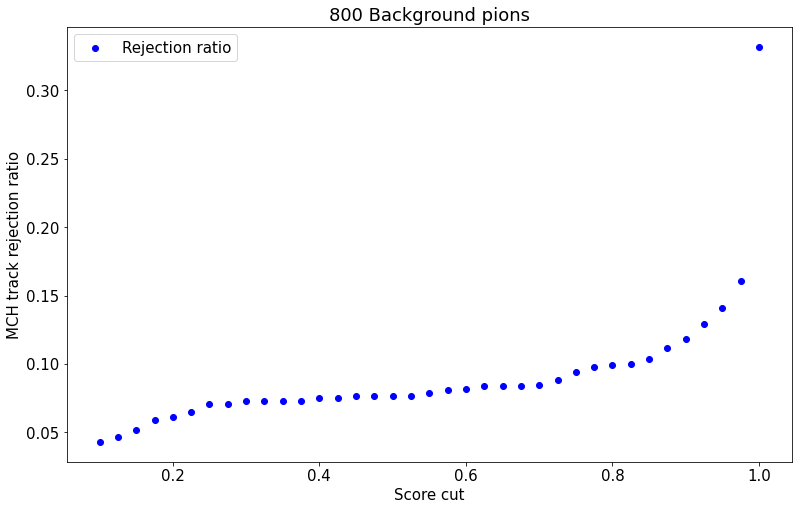

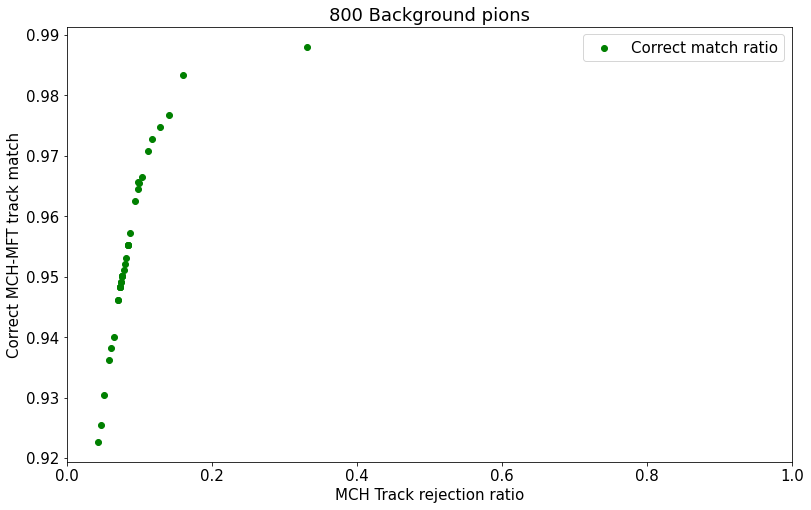

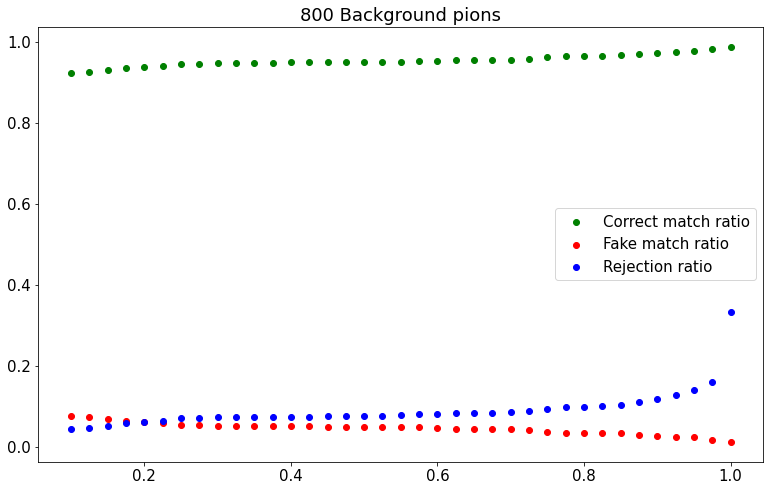

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [883. 882. 882. 881. 881. 879. 879. 879. 879. 879. 879. 879. 878. 878.
 877. 877. 877. 877. 876. 875. 875. 875. 875. 875. 874. 873. 872. 870.
 870. 869. 866. 862. 858. 849. 839. 825. 660.]
fake matches:  [74. 71. 66. 60. 58. 56. 50. 50. 48. 48. 48. 48. 47. 47. 46. 46. 46. 46.
 45. 44. 43. 41. 41. 41. 41. 39. 34. 32. 31. 31. 30. 26. 24. 22. 20. 14.
  8.]
no matches:  [ 43.  47.  52.  59.  61.  65.  71.  71.  73.  73.  73.  73.  75.  75.
  77.  77.  77.  77.  79.  81.  82.  84.  84.  84.  85.  88.  94.  98.
  99. 100. 104. 112. 118. 129. 141. 161. 332.]


In [11]:
# Load test data
NPions = "800"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")




Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_1200PiPerEvent
Loaded data in  0.09386105488374596  minutes ( 5.631663293024758  seconds)
N MCH Tracks = 1000
N pairs = 1148900
Prediction accuracy:
 0.23182921649703891


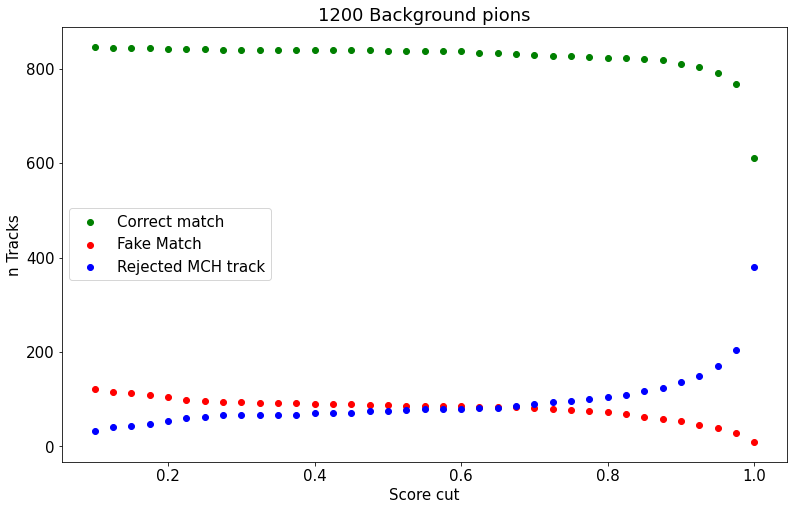

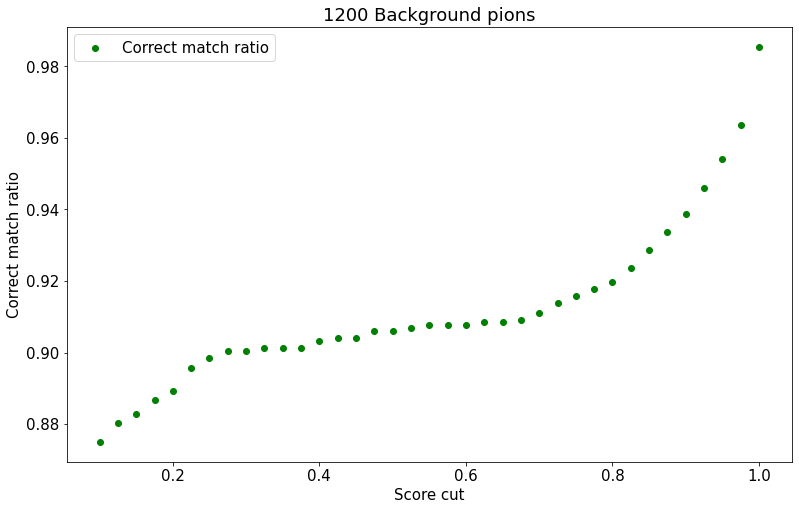

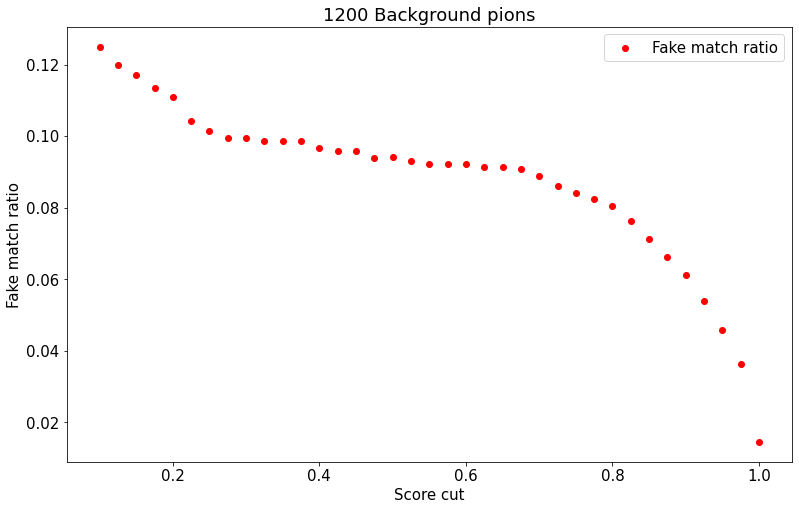

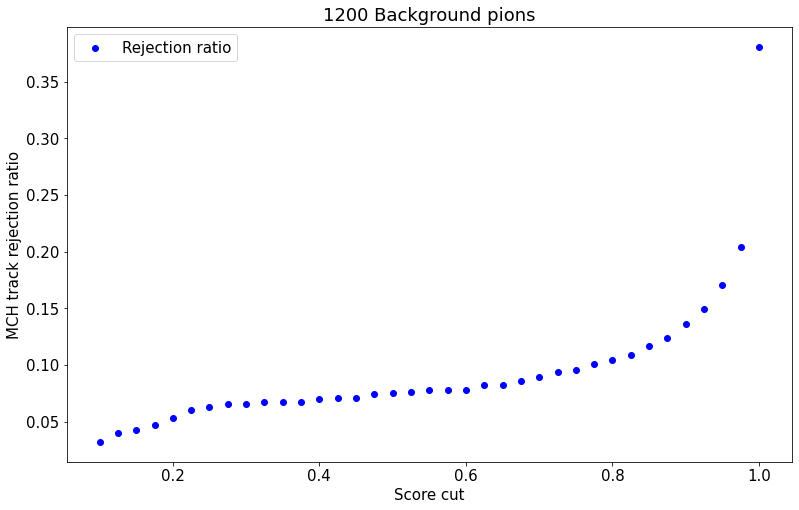

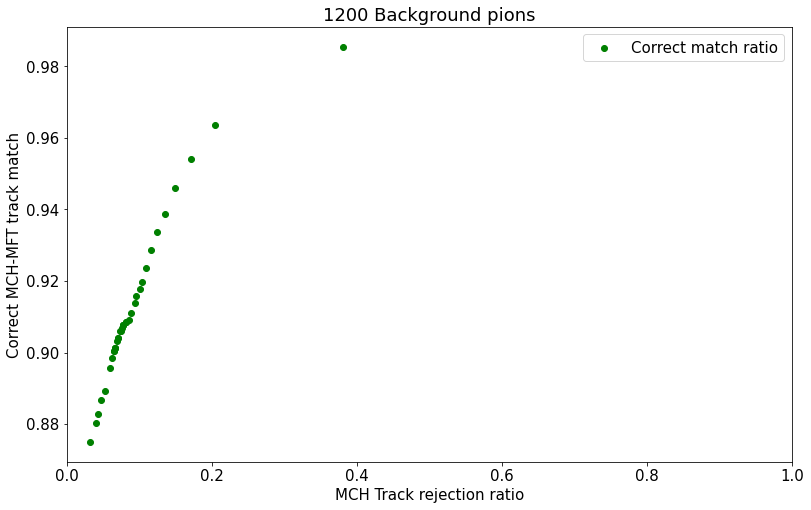

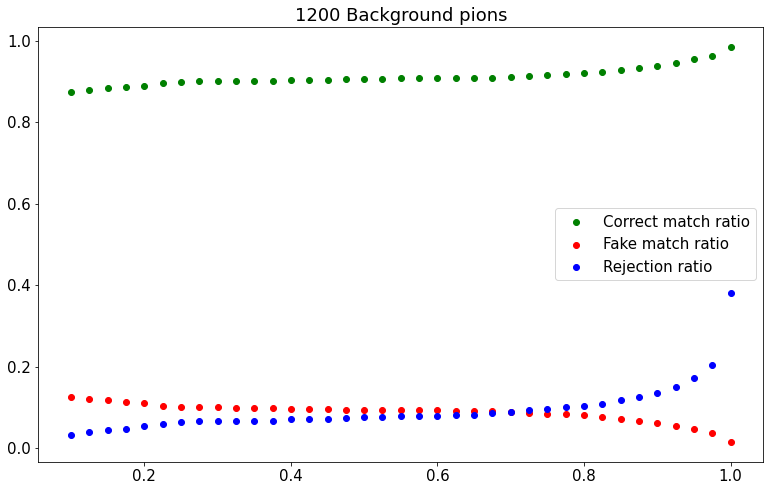

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [847. 845. 845. 845. 842. 842. 842. 841. 841. 841. 841. 841. 840. 840.
 840. 839. 838. 838. 837. 837. 837. 834. 834. 831. 830. 828. 828. 825.
 824. 823. 820. 818. 811. 805. 791. 767. 610.]
fake matches:  [121. 115. 112. 108. 105.  98.  95.  93.  93.  92.  92.  92.  90.  89.
  89.  87.  87.  86.  85.  85.  85.  84.  84.  83.  81.  78.  76.  74.
  72.  68.  63.  58.  53.  46.  38.  29.   9.]
no matches:  [ 32.  40.  43.  47.  53.  60.  63.  66.  66.  67.  67.  67.  70.  71.
  71.  74.  75.  76.  78.  78.  78.  82.  82.  86.  89.  94.  96. 101.
 104. 109. 117. 124. 136. 149. 171. 204. 381.]


In [12]:
# Load test data
NPions = "1200"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")